In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load your dataset 
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [13]:
# Standardize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [14]:
# Create a Random Forest Classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [15]:
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [16]:
# Predict on the test set
y_pred = best_rf_model.predict(X_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [18]:
# ROC Curve
y_prob = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

In [19]:
plt.figure(figsize=(16, 5))

<Figure size 1600x500 with 0 Axes>

<Figure size 1600x500 with 0 Axes>

In [20]:
# Plot results
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix')

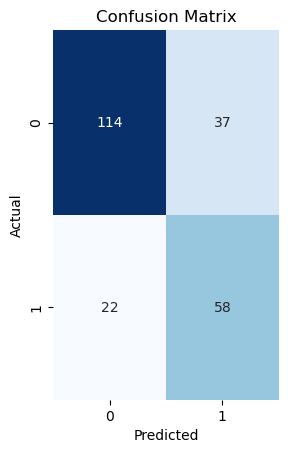

In [21]:
# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

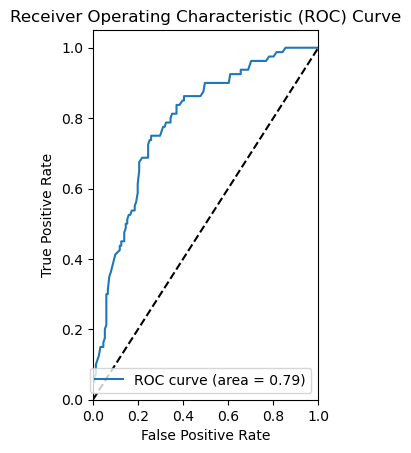

In [22]:
# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

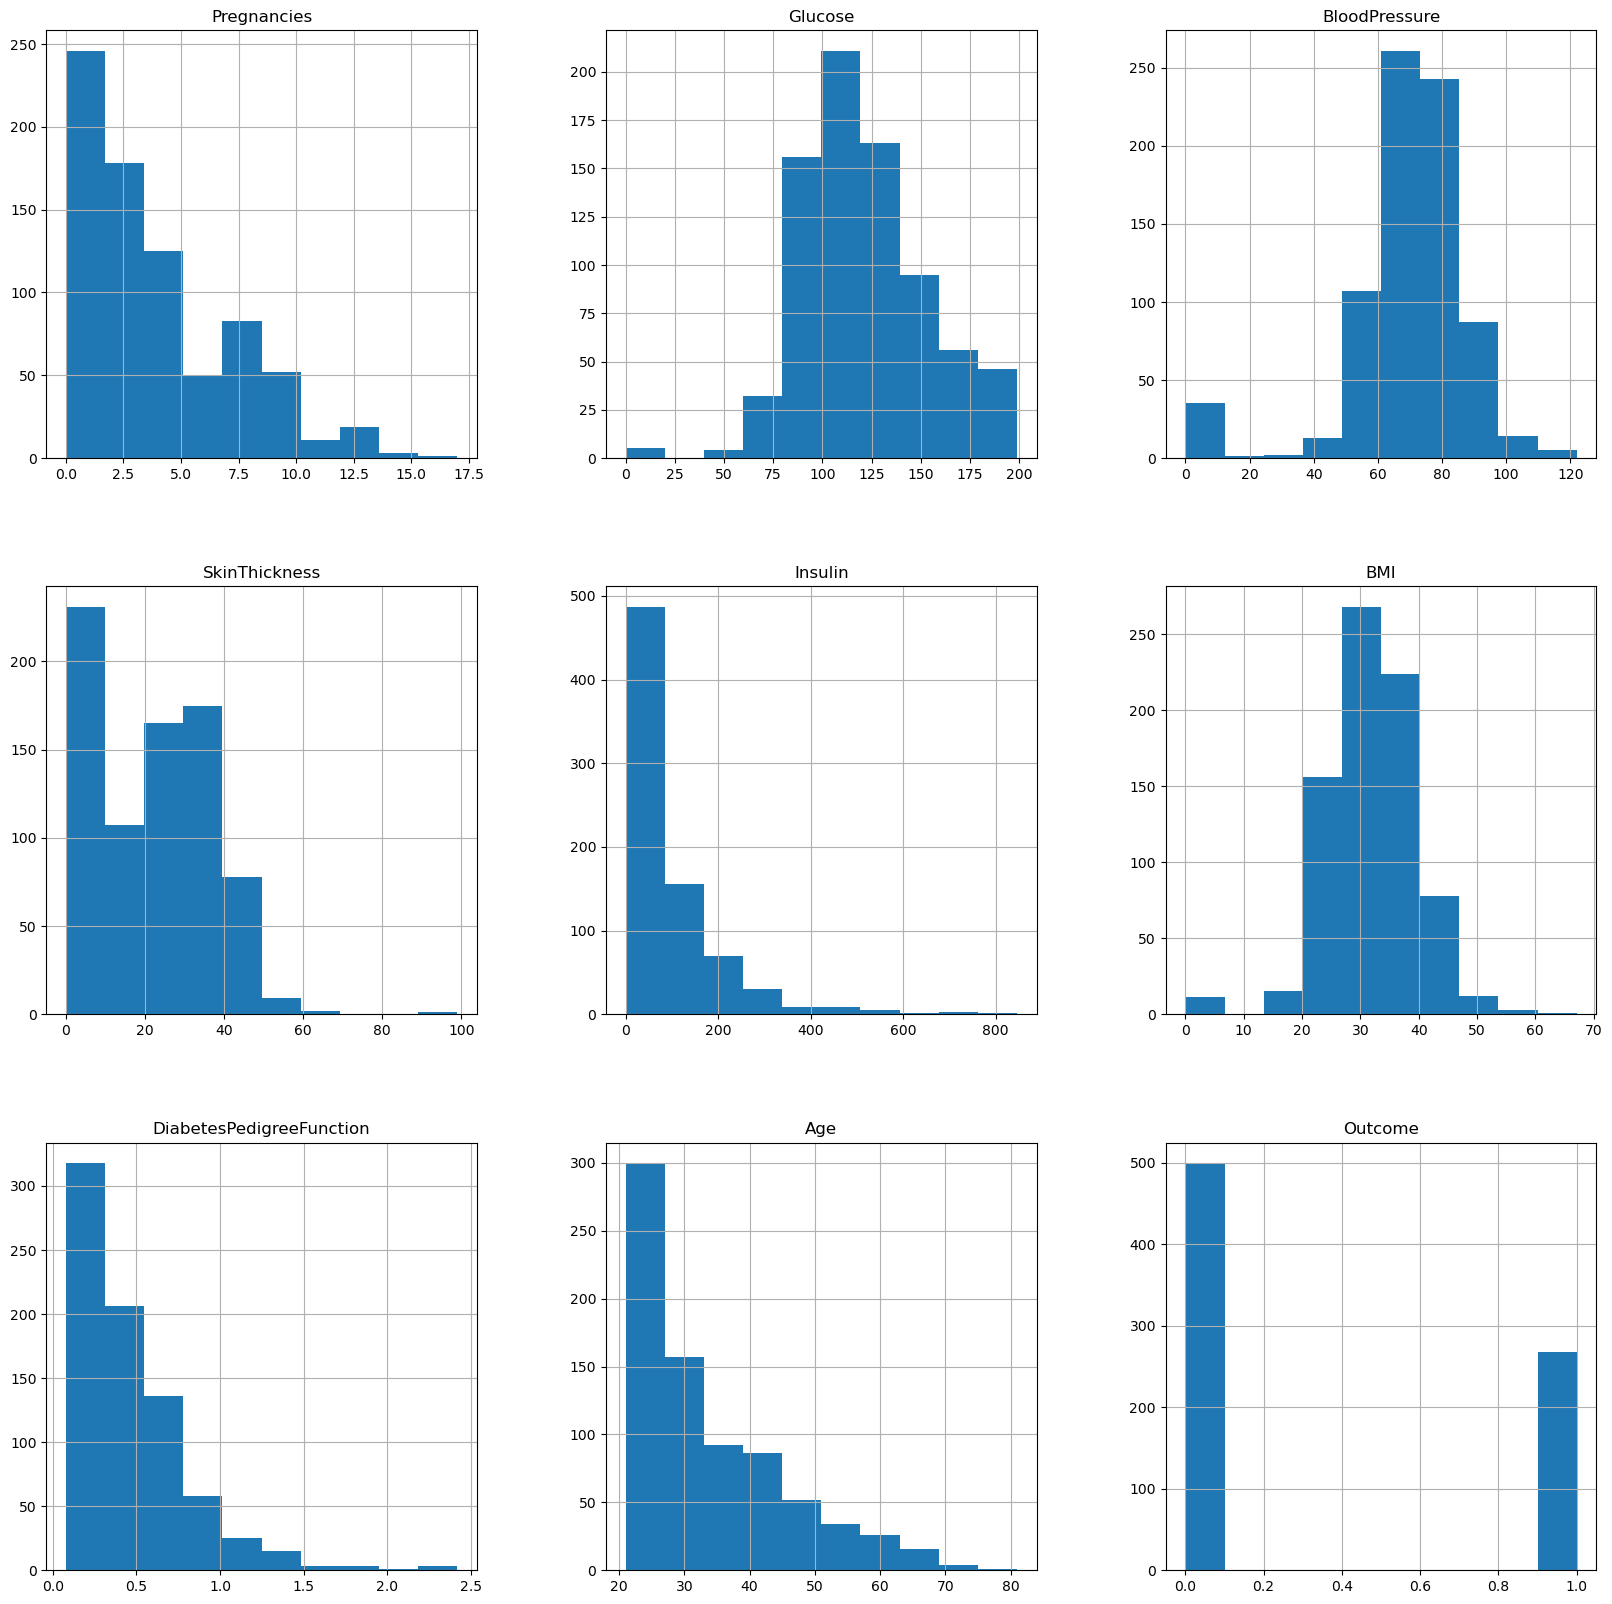

In [23]:
M = data.hist(figsize = (20,20))

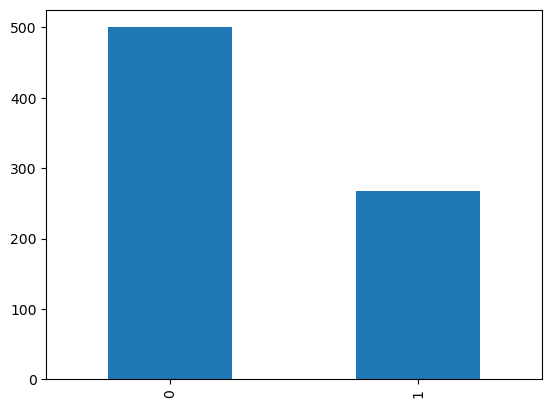

In [24]:
p= data.Outcome.value_counts().plot(kind="bar")

<Axes: >

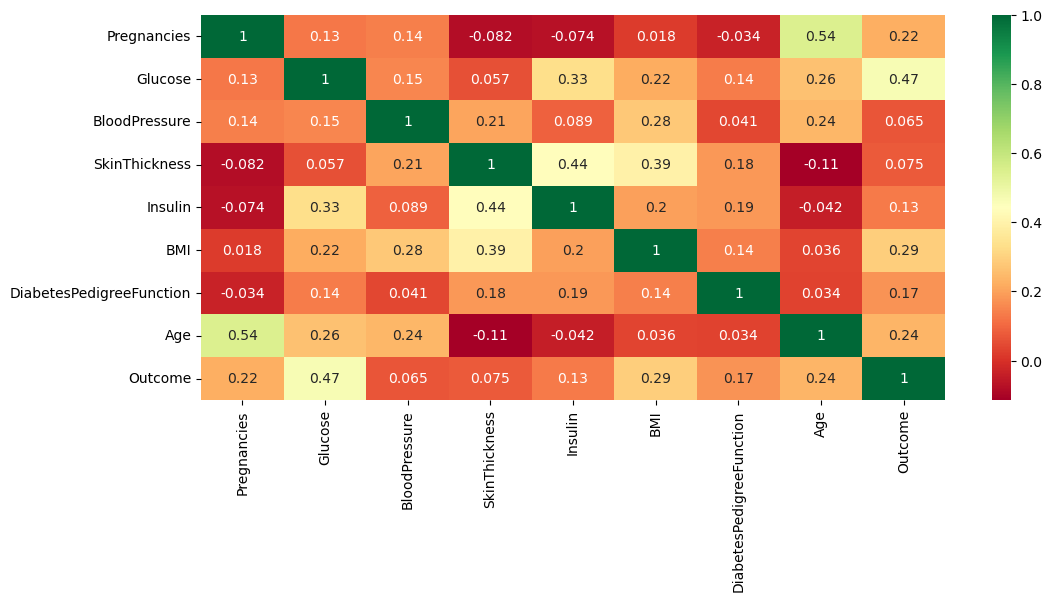

In [25]:
plt.figure(figsize=(12,5)) # seaborn has an easy method to showcase heatmap p =
sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

In [26]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: >

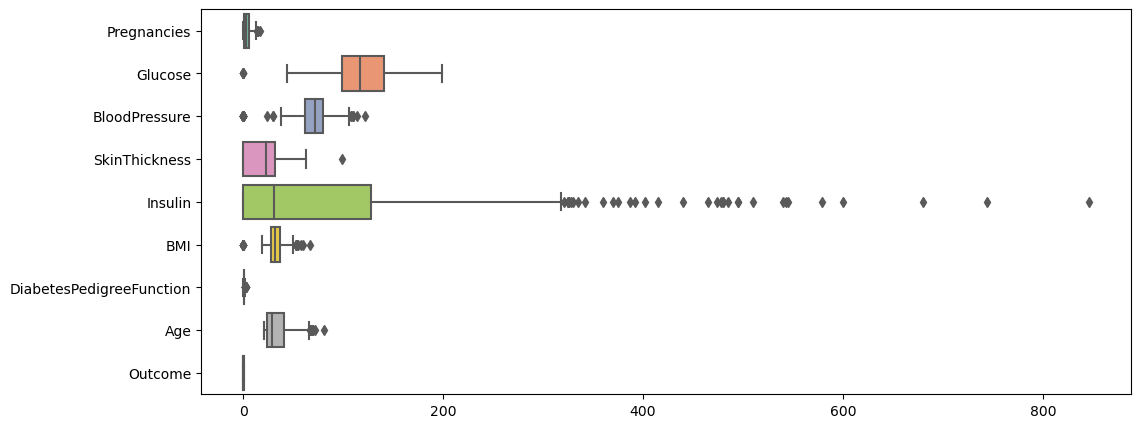

In [27]:
# Create a table box-plot
plt.figure(figsize=(12, 5))
sns.boxplot(data=data, orient="h", palette="Set2") 

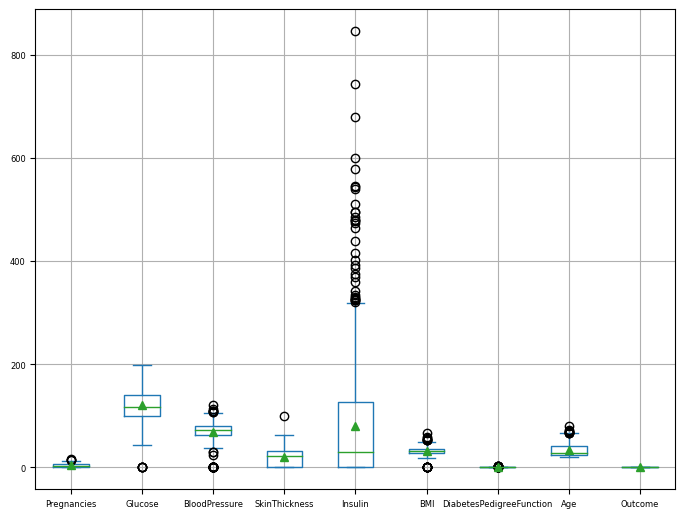

In [28]:
# plot the dataframe as needed
ax = data.plot.box(figsize=(8, 6), showmeans=True, grid=True,fontsize=6)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [30]:
rfc.feature_importances_

array([0.0809065 , 0.26472538, 0.08548762, 0.06603209, 0.07154461,
       0.17303632, 0.11703888, 0.14122861])

<Axes: >

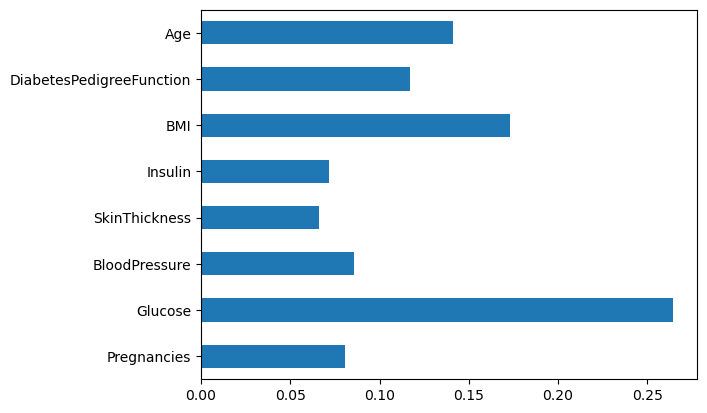

In [31]:
(pd.Series(rfc.feature_importances_, index=X.columns)
   .plot(kind='barh')) 

In [32]:
#Printing prediction probabilities for the test data
print('Prediction Probabilities')
rfc.predict_proba(X_test)

Prediction Probabilities


array([[0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.9  , 0.1  ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.9  , 0.1  ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.9  , 0.1  ],
       [0.92 , 0.08 ],
       [0.9  , 0.1  ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.975, 0.025],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.92 , 0.08 ],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.91 , 0.09 ],
       [0.905, 0.095],
       [0.875, 0.125],
       [0.975, 0.025],
       [0.905, 0.095],
       [0.975, 0.025],
       [0.98 , 0.02 ],
       [0.98 , 0.02 ],
       [0.95 , 0.05 ],
       [0.98 , 0.02 ],
       [0.9

In [ ]:
print("Best Model Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# CHECKING WHICH PATIENTS HAVE DIABETES OR NOT

In [ ]:
#Select the 3rd patient's data
patient_data = X.iloc[2]  # Index 2 corresponds to the 3rd patient

In [ ]:

# Reshape the patient's data to match the model's input shape
patient_data = patient_data.values.reshape(1, -1)

In [ ]:
patient_data = scaler.transform(patient_data)

In [ ]:
# Predict whether the 3rd patient has diabetes or not
prediction = best_rf_model.predict(patient_data)

In [ ]:
if prediction[0] == 0:
    print("The 3rd patient does not have diabetes.")
else:
    print("The 3rd patient has diabetes.")

In [ ]:
#Select the 7th patient's data
patient_data = X.iloc[6]  # Index 6 corresponds to the 3rd patient

In [ ]:
# Reshape the patient's data to match the model's input shape
patient_data = patient_data.values.reshape(1, -1)

In [ ]:
patient_data = scaler.transform(patient_data)

In [ ]:
# Predict whether the 3rd patient has diabetes or not
prediction = best_rf_model.predict(patient_data)

In [ ]:
if prediction[0] == 0:
    print("The 7th patient does not have diabetes.")
else:
    print("The 7th patient has diabetes.")

CONCLUSION



After using these patient records we are able to build a machine learning model to accurately predict
whether or not the patients in the dataset have diabetes or not.